<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/logo_cd.png">

<center><h1 style="font-size:2em;color:#2467C0"> Datos del INEGI  </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="figuras/inegi.png" align="middle" style="width:500"/></td>
<td>
    
El **INEGI** es un organismo público autónomo responsable de normar y coordinar el Sistema Nacional de Información Estadística y Geográfica, así como de captar y difundir información de México en cuanto al territorio, los recursos, la población y economía, que permita dar a conocer las características de nuestro país y ayudar a la toma de decisiones.
    
</td>
</tr>
</table>

# API del Banco de Indicadores

La API de Indicadores del INEGI permite consultar los datos y metadatos de los indicadores disponibles a nivel nacional, por entidad federativa y municipio. Puede utilizar la API para crear aplicaciones que muestren la información directamente de las bases de datos del INEGI en el preciso momento en que se actualiza.
[[1]](https://www.inegi.org.mx/servicios/api_indicadores.html) 

<img src="figuras/Inegi_token.jpg" align="middle" style="width:1000px"/>


#  Historico de Población en México

<div class="alert alert-success">
1. Graficar el crecimiento de la población total, así como el de hombres y mujeres
</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import json                      

In [2]:
#Llamado al API
#     https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000001/es/0700/false/BISE/2.0/[Aquí va tu Token]?type=json
url='https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000001/es/0700/false/BISE/2.0/4f7019f8-60f7-2212-a6ed-db6ca9251086?type=json'
respuesta = requests.get(url)
respuesta.status_code

200

In [3]:
url='https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000001/es/0700/false/BISE/2.0/4f7019f8-60f7-2212-a6ed-db6ca9251086?type=json'
respuesta = requests.get(url)
if respuesta.status_code == 200:
    #print(respuesta.content)
    contenido = json.loads(respuesta.content)
    #print(contenido)

contenido['Series'][0]['OBSERVATIONS'][0]['TIME_PERIOD']

'1910'

In [4]:
poblacion_total=[]
periodos=[]
poblacion_total = [int(element['OBS_VALUE'].split('.')[0]) for element in contenido['Series'][0]['OBSERVATIONS']]
periodos = [int(element['TIME_PERIOD']) for element in contenido['Series'][0]['OBSERVATIONS']]

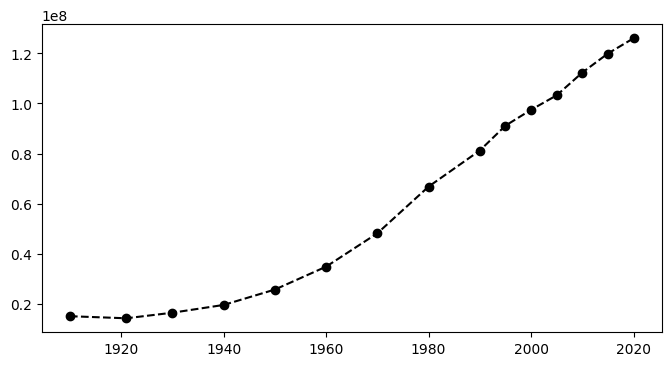

In [5]:
plt.figure(figsize=(8,4))
plt.plot( periodos , poblacion_total, 'ko--' )

In [7]:
#     https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000001/es/07000002/true/BISE/2.0/[Aquí va tu Token]?type=json
poblacion_estados = []
for estado in range(7000001,7000033):
  url= f'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000001/es/0{estado}/true/BISE/2.0/4f7019f8-60f7-2212-a6ed-db6ca9251086?type=json'
  # url='https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000001/es/0700/false/BISE/2.0/be24ce9d-c1fd-a823-14b5-cbd86b6418a1?type=json'
  respuesta = requests.get(url)
  if respuesta.status_code == 200:
      #print(respuesta.content)
      contenido = json.loads(respuesta.content)
      poblacion_estados.append(contenido['Series'][0]['OBSERVATIONS'][0]['OBS_VALUE'])
poblacion_estados = [int(float(poblacion)) for poblacion in poblacion_estados]
poblacion_estados

[1425607,
 3769020,
 798447,
 928363,
 3146771,
 731391,
 5543828,
 3741869,
 9209944,
 1832650,
 6166934,
 3540685,
 3082841,
 8348151,
 16992418,
 4748846,
 1971520,
 1235456,
 5784442,
 4132148,
 6583278,
 2368467,
 1857985,
 2822255,
 3026943,
 2944840,
 2402598,
 3527735,
 1342977,
 8062579,
 2320898,
 1622138]

<div class="alert alert-success">
2. Mostrar en un mapa  el porcentaje de población de 12 años y más económicamente activa por estados. 
Utilizar alguna gama de color que a continuación se presenta.

</div>

<img align="left" style="padding-right:10px;" src="figuras/colores.png">
